# 6Problem Statement1: Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1.Identify the null values and remove the null rows and columns by using the dropna() function2.Encode the 'diagnosis' column using the LabelEncoder()3.Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors4.Splitthe dataset into the training set and test set in a 70:30 ratio5.Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies6.Calculate and plot the confusion matrix

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Loading the dataset
data = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_6 - dataset_7lj_gsvzs0p/Assignment 6 - Dataset/Breast_Cancer_Dataset.csv')

# Displaying the first 5 rows of the dataset
data.head(20)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [76]:
data.shape

(569, 33)

In [77]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [78]:
# Identifying null values in the dataset
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [79]:
# Removing null rows
#data.dropna(axis=0, inplace=True)

# Removing null columns
#data.dropna(axis=1, inplace=True)


In [80]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [81]:
data.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [82]:


# Identifying null values in the dataset
print(data.isnull().sum())

# Removing null rows
#data.dropna(axis=0, inplace=True)

# Removing null columns
data.dropna(axis=1, inplace=True)

# Printing the shape of the dataset after removing null values
print("Shape of the dataset after removing null values: ", data.shape)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [83]:
# Encoding the 'diagnosis' column using LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])


In [84]:
# Separating the target variable and the feature vectors
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']


In [85]:
# Splitting the dataset into the training set and test set in a 70:30 ratio
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)



In [86]:
# Building the Logistic Regression model
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression model:", acc_lr)


Accuracy of Logistic Regression model: 0.9532163742690059


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# Building the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes model:", acc_nb)


Accuracy of Naive Bayes model: 0.9239766081871345


In [88]:
# Building the Decision Tree (CART) model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree (CART) model:", acc_dt)


Accuracy of Decision Tree (CART) model: 0.9122807017543859


In [89]:
# Building the K-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-NN model:", acc_knn)


Accuracy of K-NN model: 0.9473684210526315


In [90]:
# Building the SVM model
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM model:", acc_svm)


Accuracy of SVM model: 0.9239766081871345


In [91]:
# Building the Random Forest Classifier model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier model:", acc_rf)


Accuracy of Random Forest Classifier model: 0.9590643274853801


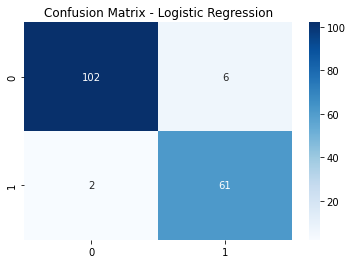

In [92]:
# Calculating the confusion matrix for the Logistic Regression model
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


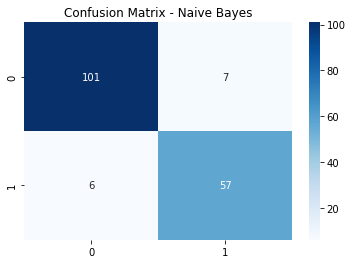

In [93]:
# Calculating the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


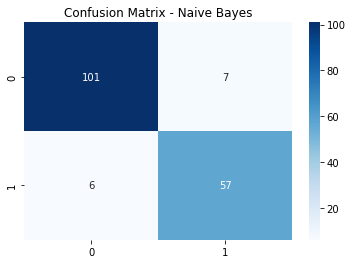

In [94]:
# Calculating the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()



In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create a Decision Tree model
dtree_model = DecisionTreeClassifier()

# Train the model using the training set
dtree_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dtree_model.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[96 12]
 [ 4 59]]


# 

In [96]:
# Calculate the  ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC score:", roc_auc)


ROC_AUC score: 0.9126984126984127


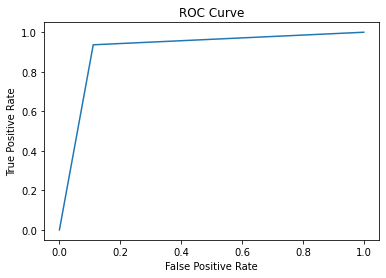

In [97]:
# Plot the ROC Curve using the Matplotlib library
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [99]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)


F1 score: 0.8805970149253731


In [100]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       108
           1       0.83      0.94      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



# Problem Statement3: Load the ‘voice.csv’ dataset into a DataFrame and perform the following tasks:
1.Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’2.Using the preprocessing() function, label the target column3.Separate the targetvariable and the feature vectors4.Build a RandomForestClassifier model and find the best parameters using a Grid search5.Print the best parameters and the best estimator

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_6 - dataset_7lj_gsvzs0p/Assignment 6 - Dataset/voice.csv')



In [2]:
df.head(15)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [3]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [4]:
#Rename the 'label' column as 'Gender_Identified':

df = df.rename(columns={'label': 'Gender_Identified'})


In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'Gender_Identified'],
      dtype='object')

In [6]:
#Using the preprocessing() function, label the target column
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Gender_Identified'] = le.fit_transform(df['Gender_Identified'])


In [7]:
le

LabelEncoder()

In [8]:
# Separate the targetvariable and the feature vectors
X = df.drop('Gender_Identified', axis=1)
y = df['Gender_Identified']
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [14]:
# Build a RandomForestClassifier model and find the best parameters using a Grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)
# Print the best parameters and the best estimator
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best estimator: RandomForestClassifier(min_samples_leaf=4, n_estimators=150)


In [13]:
# Print the best parameters and the best estimator
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)


# Problem Statement4:The ‘seeds.csv’ dataset contains the data about the wheat seeds, the ‘Type’ column consisit of three unique values, 1, 2, 3,which are classified based on the charecterstics of seeds entailing in other columns.Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:
1.Considering the 'Type' column as target, analyze  the target column by printing the uniquevalues2.Separate the feature vectors and the target variable3.Split the dataset into train and test sets in a 70:30 ratio4.Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores5.For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot

In [21]:
# Importing the required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [22]:
seeds_df = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_6 - dataset_7lj_gsvzs0p/Assignment 6 - Dataset/seeds.csv')
seeds_df.head(10)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1


In [23]:
# Considering the 'Type' column as target, analyze  the target column by printing the uniquevalues
print("Unique values in the target column:")
print(seeds_df['Type'].unique())


Unique values in the target column:
[1 2 3]


In [24]:

#Separate the feature vectors and the target variable
X = seeds_df.drop('Type', axis=1)
y = seeds_df['Type']


In [25]:
# Splitting the dataset into train and test sets in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Building a Decision Tree Classifier and a GaussianNB model and printing their accuracy scores
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_clf_acc = accuracy_score(y_test, dt_clf.predict(X_test))
print("Accuracy of Decision Tree Classifier:", dt_clf_acc)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_clf_acc = accuracy_score(y_test, gnb_clf.predict(X_test))
print("Accuracy of GaussianNB Classifier:", gnb_clf_acc)



Accuracy of Decision Tree Classifier: 0.9166666666666666
Accuracy of GaussianNB Classifier: 0.9333333333333333


In [27]:
# Boosting the accuracy of Decision Tree Classifier and GaussianNB models using ADA Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_dt_clf = ada_boost.fit(X_train, y_train)
ada_boost_dt_clf_acc = accuracy_score(y_test, ada_boost_dt_clf.predict(X_test))
print("Accuracy of Decision Tree Classifier with ADA Boost Classifier:", ada_boost_dt_clf_acc)

ada_boost_gnb_clf = ada_boost.fit(X_train, y_train)
ada_boost_gnb_clf_acc = accuracy_score(y_test, ada_boost_gnb_clf.predict(X_test))
print("Accuracy of GaussianNB Classifier with ADA Boost Classifier:", ada_boost_gnb_clf_acc)



Accuracy of Decision Tree Classifier with ADA Boost Classifier: 0.5333333333333333
Accuracy of GaussianNB Classifier with ADA Boost Classifier: 0.5333333333333333


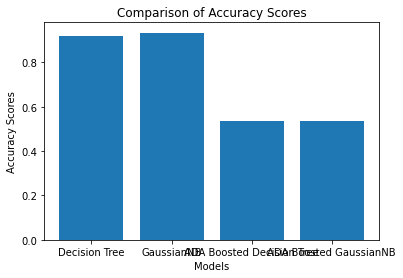

In [28]:
#For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot
models = ['Decision Tree', 'GaussianNB', 'ADA Boosted Decision Tree', 'ADA Boosted GaussianNB']
accuracy_scores = [dt_clf_acc, gnb_clf_acc, ada_boost_dt_clf_acc, ada_boost_gnb_clf_acc]
plt.bar(models, accuracy_scores)
plt.title("Comparison of Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy Scores")
plt.show()